<a href="https://colab.research.google.com/github/AkashRathod25/Deep-Learning-6-July/blob/main/7_Restaurant_Reviews_project_(28_7_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with Keras

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

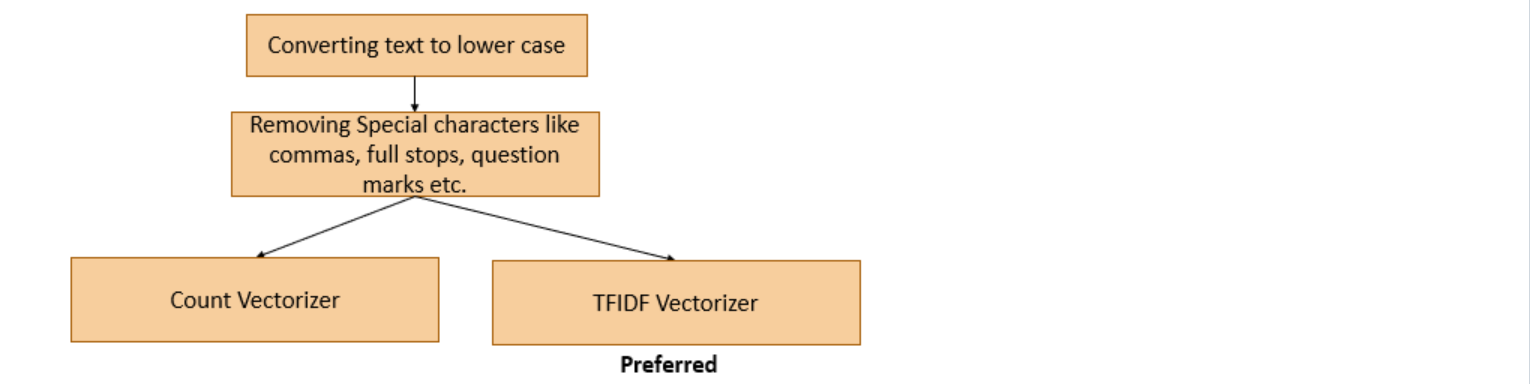

# Step 1: Read the dataset

In [2]:
import pandas as pd
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/Restaurant_Reviews.tsv"
df = pd.read_csv(url1 , sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
a = 'HELLO , Welcome to the my course'
s = a.lower()
s

'hello , welcome to the my course'

In [4]:
ss = a.upper()
ss

'HELLO , WELCOME TO THE MY COURSE'

# 1.1.Provide proper pattern [^a-z]

In [6]:
import re
a1 = re.sub("[^a-z ]" , "" , s)

a1

'hello  welcome to the my course'

# 1.2.Create a function to preprocess text

In [21]:
def preprocess_text(a):
  s = a.lower()
  s = re.sub("[^a-z ]" , "" , s)
  return s

In [22]:
d = "Wow... , The expericence was very good"
preprocess_text(d)


'wow  the expericence was very good'

# 1.3.Apply preprocessing on dataframe


In [24]:
df['Review_pre'] = df['Review'].apply(preprocess_text)

df

,Review,Liked,Review_pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


# 1.4.Apply TFIDF Vectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_pre = tfidf.fit_transform(df['Review_pre']).toarray()

X_pre


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
X_pre.shape

(1000, 2046)

In [30]:
Y = df['Liked']
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


# 2.Apply Train test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
xtrain , xtest , ytrain , ytest = train_test_split(X_pre , Y , test_size=0.2 , random_state=18)

In [36]:
xtrain[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
ytrain[0:5]

,Liked
616,0
931,0
768,1
182,0
722,1


In [37]:
xtest[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
ytest[0:5]

,Liked
246,1
751,1
75,0
395,1
966,0


In [44]:
xtrain.shape

(800, 2046)

In [45]:
xtest.shape

(200, 2046)

# 3.Build The Neural Net

In [46]:
from keras.models import Sequential
from keras.layers import Input , Dense , Dropout
from keras.callbacks import EarlyStopping

In [53]:
model = Sequential()
# Input Layer
model.add(Input(shape=(xtrain.shape[1],)))

# Hidden Layer 1
model.add(Dense(256 , activation='relu'))
# Dropout Layer 1
model.add(Dropout(0.6))

# Hidden Layer 2
model.add(Dense(128 , activation='relu'))
# Dropout Layer 2
model.add(Dropout(0.6))

# Output Layer
model.add(Dense(1 , activation='sigmoid'))

In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │         524,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 557,057 (2.13 MB)

 Trainable params: 557,057 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Model Compile

model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [56]:
es = EarlyStopping(patience=10)

In [57]:
hist = model.fit(xtrain , ytrain ,
                 epochs=100 ,
                 batch_size=16 ,
                 validation_split=0.2 ,
                 callbacks=[es])

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4834 - loss: 0.6948 - val_accuracy: 0.5500 - val_loss: 0.6870
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6221 - loss: 0.6794 - val_accuracy: 0.6562 - val_loss: 0.6673
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7611 - loss: 0.6300 - val_accuracy: 0.7000 - val_loss: 0.5988
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8735 - loss: 0.4574 - val_accuracy: 0.7437 - val_loss: 0.4993
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9448 - loss: 0.2224 - val_accuracy: 0.7750 - val_loss: 0.4715
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9748 - loss: 0.0949 - val_accuracy: 0.7750 - val_loss: 0.4888
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9862 - loss: 0.0541 - val_accuracy: 0.7563 - val_loss: 0.5281
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9992 - loss: 0.0202 - val_accuracy: 0.7563 - 

# 3.1.Learning curve

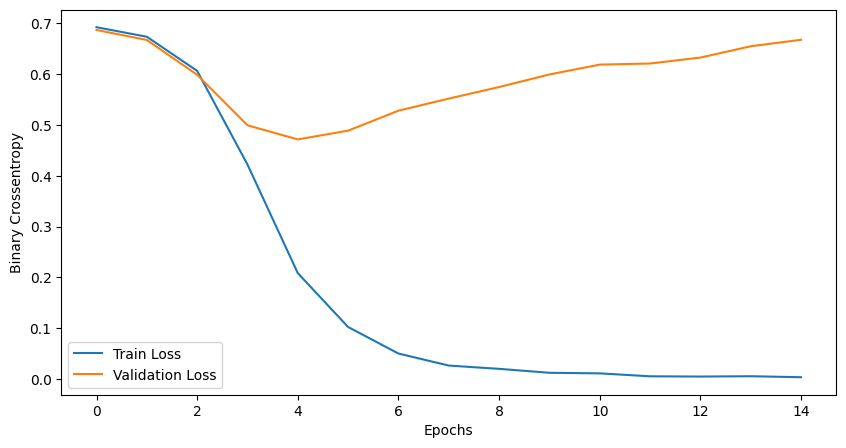

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10 , 5))
plt.plot(hist.history['loss'] , label = 'Train Loss')
plt.plot(hist.history['val_loss'] , label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.show()

# 4.Evaluate the model

In [62]:
model.evaluate(xtrain , ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9923 - loss: 0.0223     


[0.13409502804279327, 0.9537500143051147]

In [61]:
model.evaluate(xtest , ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7888 - loss: 0.6209


[0.5190643668174744, 0.8149999976158142]

# 5.Predict results for train and test

In [80]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [65]:
yprob_train[0:5]

array([[1.09459725e-04],
       [5.00195019e-04],
       [9.99945402e-01],
       [1.20585377e-03],
       [9.99980807e-01]], dtype=float32)

In [67]:
ytrain[0:5]

,Liked
616,0
931,0
768,1
182,0
722,1


In [70]:
yprob_test[0:5]

array([[8.3897406e-01],
       [2.4420279e-01],
       [9.9481529e-01],
       [8.5788965e-02],
       [2.0194837e-04]], dtype=float32)

In [71]:
ytest[0:5]

,Liked
246,1
751,1
75,0
395,1
966,0


In [82]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]

In [85]:
ypred_train[0:5]

[0, 0, 1, 0, 1]

In [86]:
ypred_test[0:5]

[1, 0, 1, 0, 0]

### **5.1.Confusion Matrix**

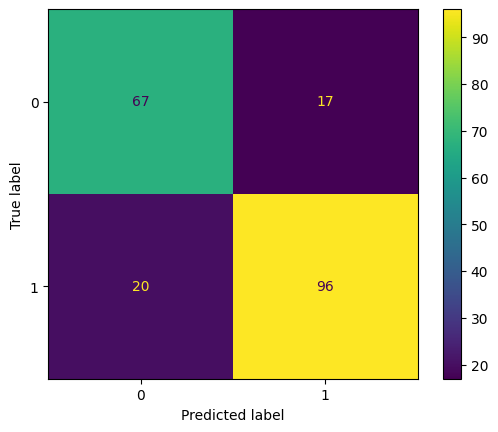

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest , ypred_test)


### **5.2.Classification Report**

In [88]:
from sklearn.metrics import classification_report
print(classification_report(ytest , ypred_test))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78        84
           1       0.85      0.83      0.84       116

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.82      0.81      0.82       200



# 6.Save the model for future use

In [89]:
model.save('Sentiment_Model.keras')

### **6.1.Load the model**


In [91]:
from keras.models import load_model

In [92]:
new = load_model('Sentiment_Model.keras')
new.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │         524,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,671,173 (6.38 MB)

 Trainable params: 557,057 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,114,116 (4.25 MB)

# 7.Out of sample prediction

In [102]:
n = "I Love the Choclate Very Much"
t = tfidf.transform([n]).toarray()
t

array([[0., 0., 0., ..., 0., 0., 0.]])

In [103]:
model.predict(t)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.99144405]], dtype=float32)

In [108]:
def predict_sentiment():
  text = input("Please enter restaurant review : ")
  text = preprocess_text(text)
  text_pre = tfidf.transform([text]).toarray()
  prob = model.predict(text_pre)
  if prob>=0.5:
    print('Positive Review')
  else:
    print('Negative Review')
  return prob


In [109]:
predict_sentiment()

Please enter restaurant review : food was so good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Positive Review


array([[0.9996102]], dtype=float32)

In [110]:
predict_sentiment()

Please enter restaurant review : The taste of food is not good 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Negative Review


array([[0.02749115]], dtype=float32)

In [111]:
predict_sentiment()


Please enter restaurant review : not like the restaurant
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Negative Review


array([[0.01630331]], dtype=float32)